In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time
import lightgbm as lgb
import datetime
import time

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,GroupKFold,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
ID_52_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_052_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_85_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_085_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_86_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_086_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_45_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_045_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_70_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_070_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_133_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_133_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_134_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_134_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_135_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_135_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_136_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_136_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_137_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_137_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_138_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_138_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_72_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_072_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [15]:
ID_13_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_013_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_14_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_014_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_25_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_025_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_51_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_051_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
# ID_58_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_058_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


In [18]:
ID_52_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_052_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


In [16]:
ID_85_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_085_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


In [3]:
ID_141_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_141_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_142_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_142_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_51_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_051_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


In [2]:
ID_86_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_086_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


In [13]:
ID_86_2020

,CreateDateTime,TagValue,TagId
0,2020-02-06 13:05:56.982,0.0,86
1,2020-02-10 19:41:42.687,1.0,86
2,2020-02-10 19:49:24.020,0.0,86
3,2020-02-10 19:54:15.181,1.0,86
4,2020-02-10 20:32:40.922,0.0,86
...,...,...,...
24650,2020-12-04 00:52:56.114,1.0,86
24651,2020-12-04 00:54:08.712,0.0,86
24652,2020-12-04 01:06:46.013,1.0,86
24653,2020-12-04 01:09:28.811,0.0,86


In [19]:
ID_86_2020.loc[18900:18950]

,CreateDateTime,TagValue,TagId
18900,2020-10-22 17:56:16.671,0.0,86
18901,2020-10-22 18:01:16.435,1.0,86
18902,2020-10-22 18:02:57.924,0.0,86
18903,2020-10-22 18:11:47.457,1.0,86
18904,2020-10-22 18:14:35.976,0.0,86
18905,2020-10-22 18:17:32.986,1.0,86
18906,2020-10-22 18:18:44.122,0.0,86
18907,2020-10-22 18:29:45.387,1.0,86
18908,2020-10-22 18:32:04.785,0.0,86
18909,2020-10-22 18:33:57.521,1.0,86


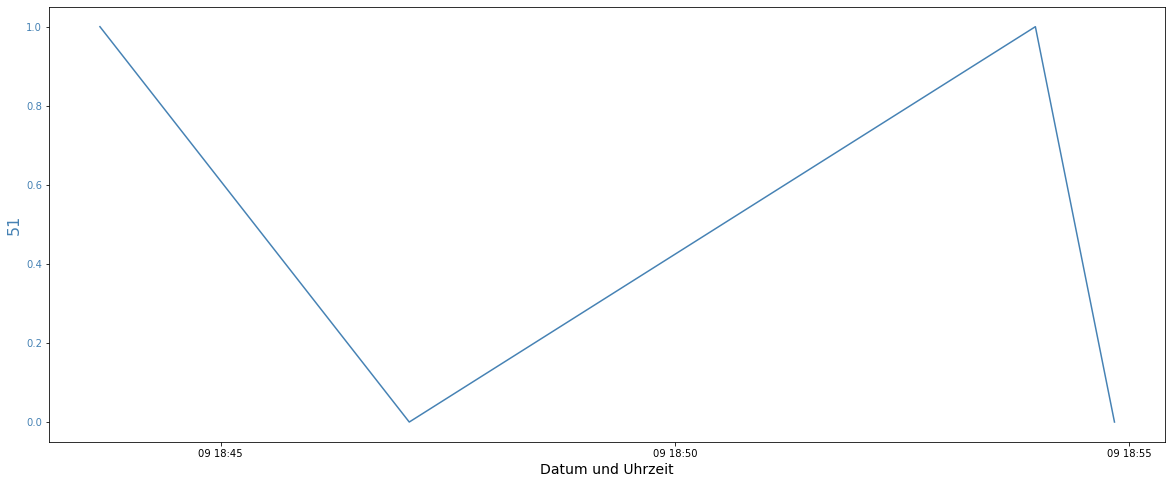

In [12]:
Daten_1=ID_86_2020
# Daten_2=ID_58_2020
# Daten_3=ID_45_2020

Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-11-09 18:05:00')&(Daten_1['CreateDateTime']<'2020-11-09 19:45:00')]
# Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-02-12 08:05:00')&(Daten_2['CreateDateTime']<'2020-02-12 08:40:00')]
# Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_3['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('51', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


# ax2 = ax.twinx()
# #ax2 = ax.twiny()
# #add second line to plot
# ax2.set_ylabel('58', color=col2, fontsize=16)
# ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
# ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((-5, 5))

(-5.0, 5.0)

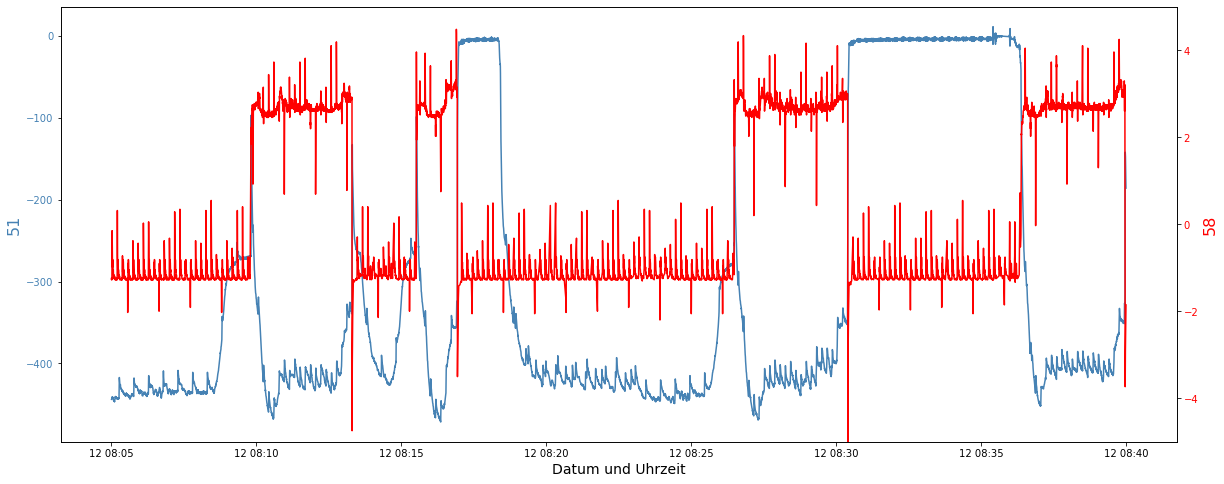

In [9]:
Daten_1=ID_51_2020
Daten_2=ID_58_2020
# Daten_3=ID_45_2020

Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-02-12 08:05:00')&(Daten_1['CreateDateTime']<'2020-02-12 08:40:00')]
Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-02-12 08:05:00')&(Daten_2['CreateDateTime']<'2020-02-12 08:40:00')]
# Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_3['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('51', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('58', color=col2, fontsize=16)
ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-5, 5))

(-2.0, 8.0)

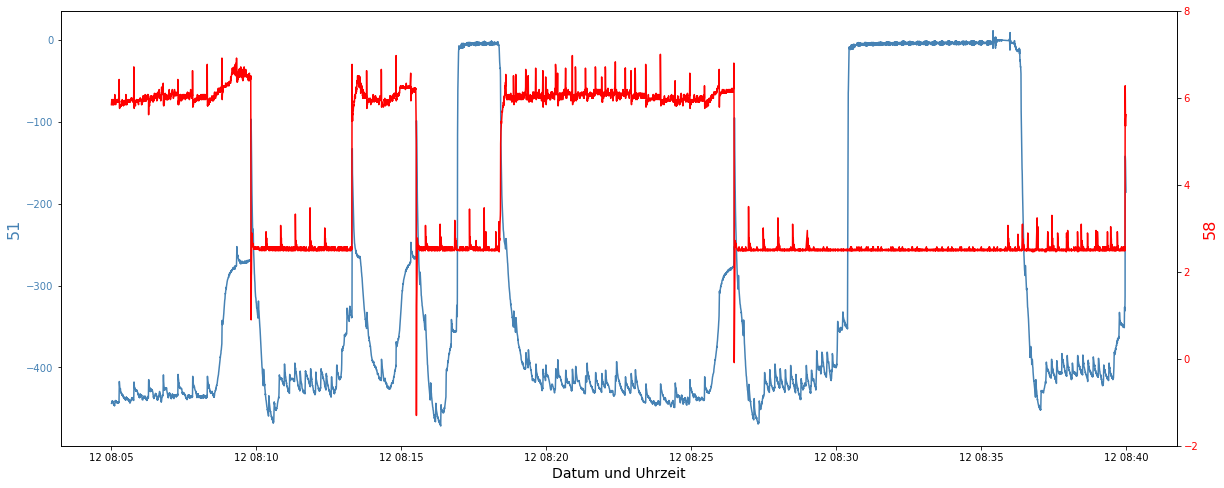

In [23]:
Daten_1=ID_51_2020
Daten_2=ID_52_2020
# Daten_3=ID_45_2020

Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-02-12 08:05:00')&(Daten_1['CreateDateTime']<'2020-02-12 08:40:00')]
Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-02-12 08:05:00')&(Daten_2['CreateDateTime']<'2020-02-12 08:40:00')]
# Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_3['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('51', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('58', color=col2, fontsize=16)
ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-2, 8))

(-5.0, 5.0)

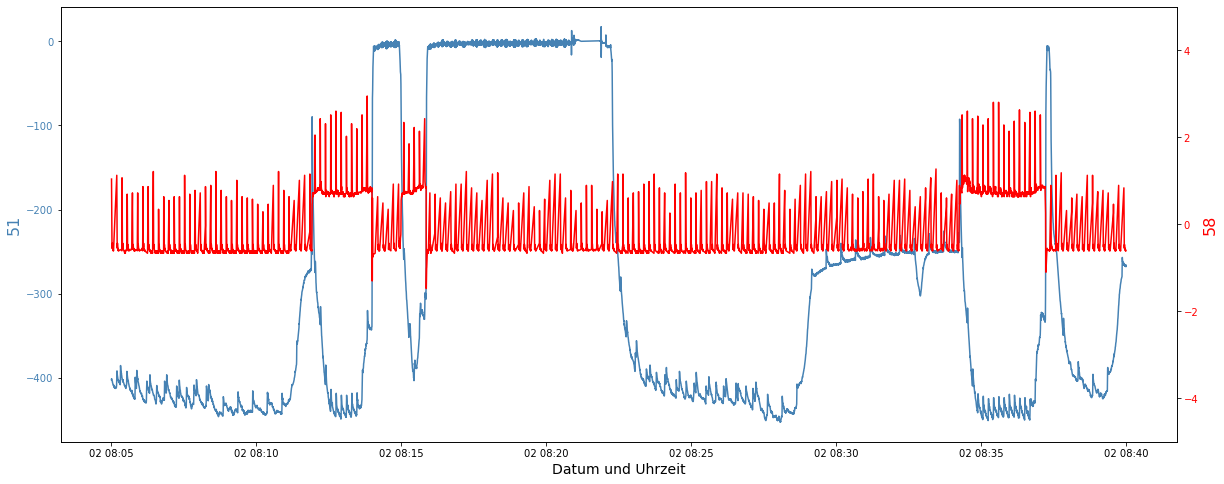

In [10]:
Daten_1=ID_51_2020
Daten_2=ID_58_2020
# Daten_3=ID_45_2020

Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-08-02 08:05:00')&(Daten_1['CreateDateTime']<'2020-08-02 08:40:00')]
Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-08-02 08:05:00')&(Daten_2['CreateDateTime']<'2020-08-02 08:40:00')]
# Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_3['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('51', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('58', color=col2, fontsize=16)
ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-5, 5))

(-2.0, 6.0)

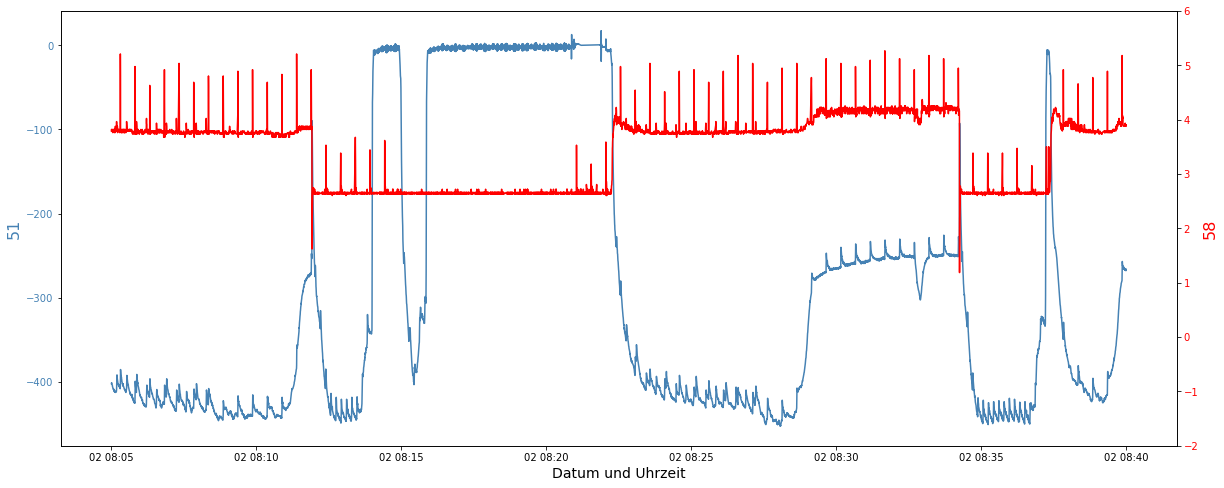

In [21]:
Daten_1=ID_51_2020
Daten_2=ID_52_2020
# Daten_3=ID_45_2020

Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-08-02 08:05:00')&(Daten_1['CreateDateTime']<'2020-08-02 08:40:00')]
Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-08-02 08:05:00')&(Daten_2['CreateDateTime']<'2020-08-02 08:40:00')]
# Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_3['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('51', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('58', color=col2, fontsize=16)
ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-2, 6))

(-7.0, 7.0)

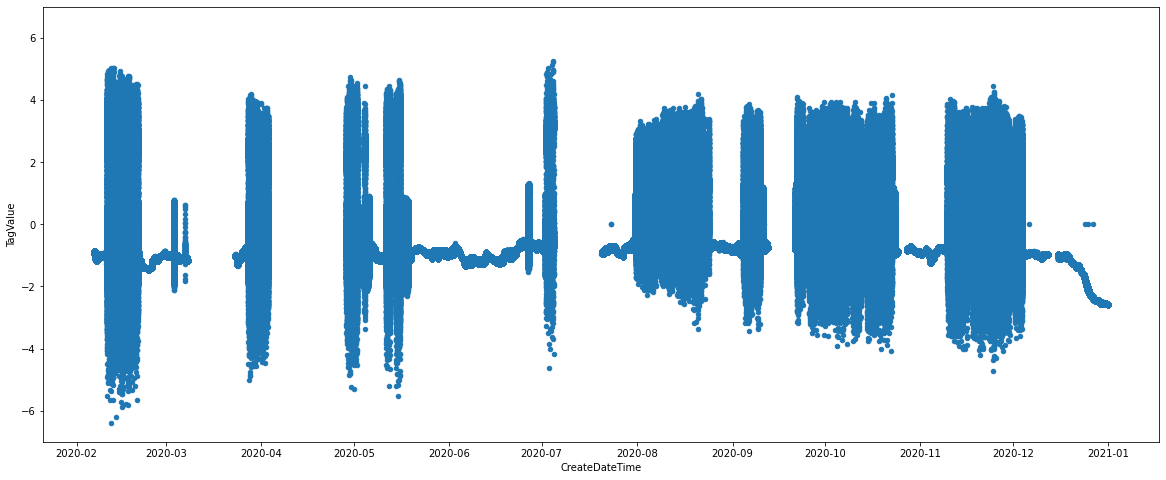

In [14]:
ID_58_2020.plot('CreateDateTime','TagValue',figsize=(20, 8),kind='scatter')
plt.ylim((-7, 7))

(0.0, 1.0)

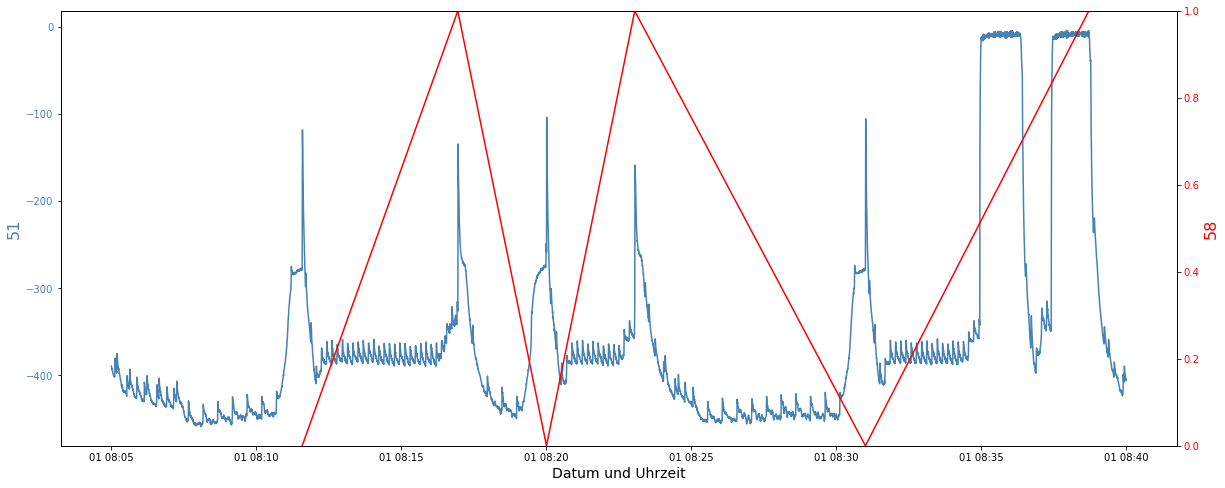

In [6]:
Daten_1=ID_51_2020
Daten_2=ID_85_2020
# Daten_3=ID_45_2020

Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-04-01 08:05:00')&(Daten_1['CreateDateTime']<'2020-04-01 08:40:00')]
Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-04-01 08:05:00')&(Daten_2['CreateDateTime']<'2020-04-01 08:40:00')]
# Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_3['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('51', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((1.5, 6))


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('58', color=col2, fontsize=16)
ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((0, 1))

(-5.0, 5.0)

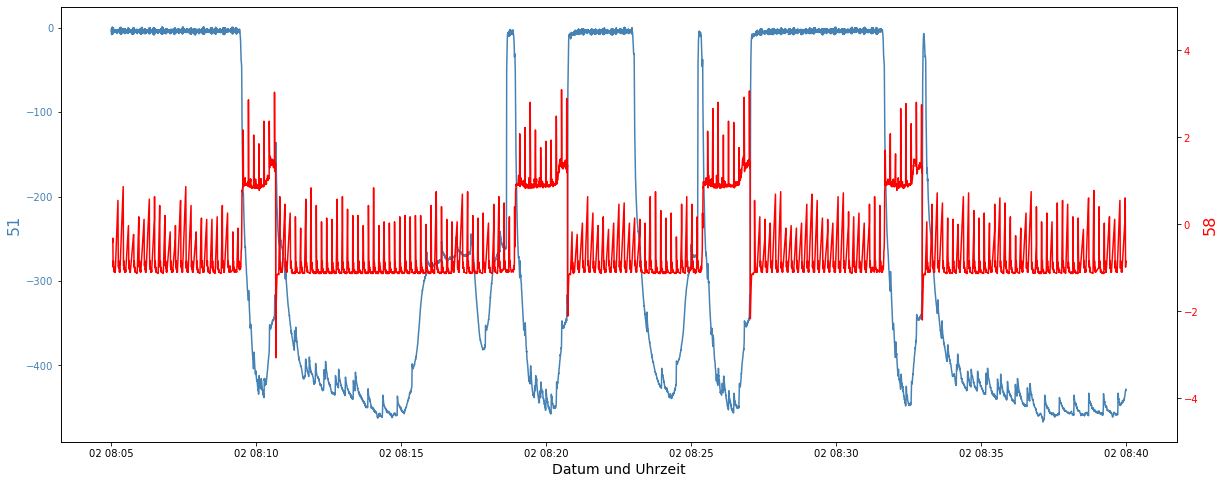

In [17]:
Daten_1=ID_51_2020
Daten_2=ID_58_2020
# Daten_3=ID_45_2020

Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-10-02 08:05:00')&(Daten_1['CreateDateTime']<'2020-10-02 08:40:00')]
Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-10-02 08:05:00')&(Daten_2['CreateDateTime']<'2020-10-02 08:40:00')]
# Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_3['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('51', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((1.5, 6))


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('58', color=col2, fontsize=16)
ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-5, 5))

In [8]:
Daten_1 = ID_51_2020.set_index('CreateDateTime').join(ID_141_2020.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
Daten_1 = Daten_1.reset_index('CreateDateTime')
Daten_1

,CreateDateTime,TagValue_l,TagId_l,TagValue_r,TagId_r
0,2020-02-06 13:05:56.982,-4.050903,51.0,0.0,141.0
1,2020-02-06 13:05:57.207,-2.314819,51.0,NaN,NaN
2,2020-02-06 13:05:57.411,-4.050903,51.0,NaN,NaN
3,2020-02-06 13:05:58.025,-2.314819,51.0,NaN,NaN
4,2020-02-06 13:05:58.230,-3.472168,51.0,NaN,NaN
...,...,...,...,...,...
41576665,2020-12-19 00:11:20.126,0.000000,51.0,NaN,NaN
41576666,2020-12-19 00:11:22.150,-1.157471,51.0,NaN,NaN
41576667,2020-12-19 00:11:22.370,0.000000,51.0,NaN,NaN
41576668,2020-12-19 00:11:22.580,-1.157471,51.0,NaN,NaN


In [9]:
Daten_1['TagValue_r'] = Daten_1['TagValue_r'].fillna(method = "ffill")
Daten_1['TagValue_l'] = Daten_1['TagValue_l'].fillna(method = "ffill")
Daten_1

,CreateDateTime,TagValue_l,TagId_l,TagValue_r,TagId_r
0,2020-02-06 13:05:56.982,-4.050903,51.0,0.0,141.0
1,2020-02-06 13:05:57.207,-2.314819,51.0,0.0,NaN
2,2020-02-06 13:05:57.411,-4.050903,51.0,0.0,NaN
3,2020-02-06 13:05:58.025,-2.314819,51.0,0.0,NaN
4,2020-02-06 13:05:58.230,-3.472168,51.0,0.0,NaN
...,...,...,...,...,...
41576665,2020-12-19 00:11:20.126,0.000000,51.0,0.0,NaN
41576666,2020-12-19 00:11:22.150,-1.157471,51.0,0.0,NaN
41576667,2020-12-19 00:11:22.370,0.000000,51.0,0.0,NaN
41576668,2020-12-19 00:11:22.580,-1.157471,51.0,0.0,NaN


In [10]:
Daten_1 = Daten_1.set_index('CreateDateTime').join(ID_142_2020.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
Daten_1 = Daten_1.reset_index('CreateDateTime')
Daten_1

,CreateDateTime,TagValue_l,TagId_l,TagValue_r,TagId_r,TagValue,TagId
0,2020-02-06 13:05:56.982,-4.050903,51.0,0.0,141.0,0.0,142.0
1,2020-02-06 13:05:57.207,-2.314819,51.0,0.0,NaN,NaN,NaN
2,2020-02-06 13:05:57.411,-4.050903,51.0,0.0,NaN,NaN,NaN
3,2020-02-06 13:05:58.025,-2.314819,51.0,0.0,NaN,NaN,NaN
4,2020-02-06 13:05:58.230,-3.472168,51.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
41829094,2020-12-19 00:11:20.126,0.000000,51.0,0.0,NaN,NaN,NaN
41829095,2020-12-19 00:11:22.150,-1.157471,51.0,0.0,NaN,NaN,NaN
41829096,2020-12-19 00:11:22.370,0.000000,51.0,0.0,NaN,NaN,NaN
41829097,2020-12-19 00:11:22.580,-1.157471,51.0,0.0,NaN,NaN,NaN


In [11]:
Daten_1['TagValue'] = Daten_1['TagValue'].fillna(method = "ffill")

(-0.1, 1.1)

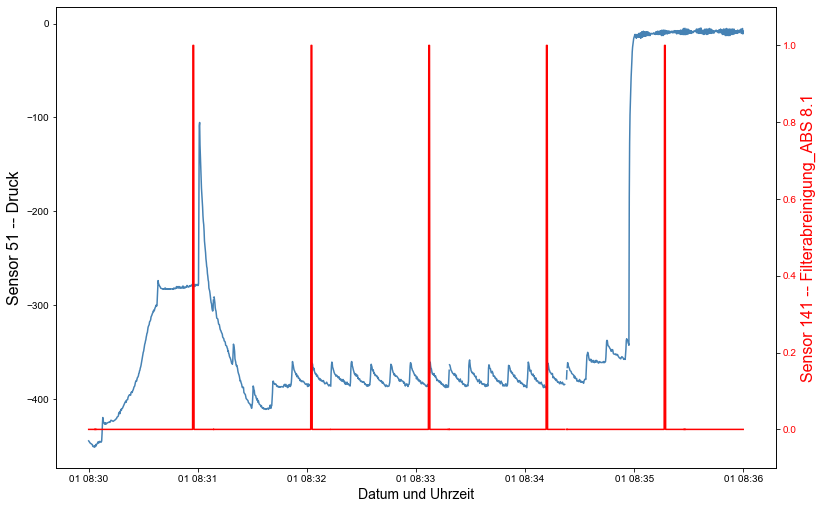

In [15]:
# load package
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

fig = plt.figure(figsize=(20,8))
ax = plt.axes((0.1,0.1,0.5,0.8))


# Daten_1=ID_51_2020
# Daten_2=ID_85_2020
# Daten_3=ID_45_2020

Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-04-01 08:30:00')&(Daten_1['CreateDateTime']<'2020-04-01 08:36:00')]
# Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-04-01 08:05:00')&(Daten_2['CreateDateTime']<'2020-04-01 08:40:00')]
# Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_3['CreateDateTime']<'2020-09-27 03:45:00')]


# fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('Sensor 51 -- Druck', fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue_l, color=col1)
ax.tick_params(axis='y')
# plt.ylim((1.5, 6))


ax2 = ax.twinx()
ax2.set_ylabel('Sensor 141 -- Filterabreinigung_ABS 8.1', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.TagValue_r, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-0.1, 1.1))

# ax3 = ax.twinx()
# ax3.set_ylabel('Sensor 142 -- Filterabreinigung_ABS 8.1', color=col3, fontsize=16)
# ax3.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col3)
# ax3.tick_params(axis='y', labelcolor=col3)
# plt.ylim((-0.1, 1.1))
# ax3.spines["right"].set_position(("axes", 1.1))

In [17]:
Daten_1 = ID_51_2020.set_index('CreateDateTime').join(ID_85_2020.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
Daten_1 = Daten_1.reset_index('CreateDateTime')
Daten_1

,CreateDateTime,TagValue_l,TagId_l,TagValue_r,TagId_r
0,2020-02-06 13:05:56.982,-4.050903,51.0,0.0,85.0
1,2020-02-06 13:05:57.207,-2.314819,51.0,NaN,NaN
2,2020-02-06 13:05:57.411,-4.050903,51.0,NaN,NaN
3,2020-02-06 13:05:58.025,-2.314819,51.0,NaN,NaN
4,2020-02-06 13:05:58.230,-3.472168,51.0,NaN,NaN
...,...,...,...,...,...
41337475,2020-12-19 00:11:20.126,0.000000,51.0,NaN,NaN
41337476,2020-12-19 00:11:22.150,-1.157471,51.0,NaN,NaN
41337477,2020-12-19 00:11:22.370,0.000000,51.0,NaN,NaN
41337478,2020-12-19 00:11:22.580,-1.157471,51.0,NaN,NaN


In [18]:
Daten_1['TagValue_r'] = Daten_1['TagValue_r'].fillna(method = "ffill")
Daten_1['TagValue_l'] = Daten_1['TagValue_l'].fillna(method = "ffill")
Daten_1

,CreateDateTime,TagValue_l,TagId_l,TagValue_r,TagId_r
0,2020-02-06 13:05:56.982,-4.050903,51.0,0.0,85.0
1,2020-02-06 13:05:57.207,-2.314819,51.0,0.0,NaN
2,2020-02-06 13:05:57.411,-4.050903,51.0,0.0,NaN
3,2020-02-06 13:05:58.025,-2.314819,51.0,0.0,NaN
4,2020-02-06 13:05:58.230,-3.472168,51.0,0.0,NaN
...,...,...,...,...,...
41337475,2020-12-19 00:11:20.126,0.000000,51.0,0.0,NaN
41337476,2020-12-19 00:11:22.150,-1.157471,51.0,0.0,NaN
41337477,2020-12-19 00:11:22.370,0.000000,51.0,0.0,NaN
41337478,2020-12-19 00:11:22.580,-1.157471,51.0,0.0,NaN


(-0.1, 1.1)

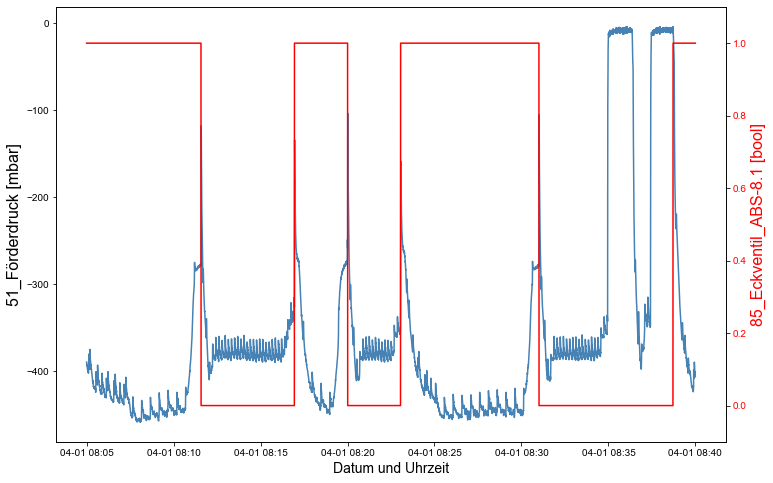

In [39]:
# load package
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator

import matplotlib.dates as mdate

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

# fig = plt.figure(figsize=(12,8))
# ax = plt.axes((0.1,0.1,0.5,0.8))

ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))  # 横坐标标签显示的日期格式
# Daten_1=ID_51_2020
# Daten_2=ID_85_2020
# Daten_3=ID_45_2020

Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-04-01 08:05:00')&(Daten_1['CreateDateTime']<'2020-04-01 08:40:00')]
# Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-04-01 08:05:00')&(Daten_2['CreateDateTime']<'2020-04-01 08:40:00')]
# Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_3['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(12, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('51_Förderdruck [mbar]', fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue_l, color=col1)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%m-%d %H:%M'))  # 横坐标标签显示的日期格式
ax.tick_params(axis='y')



ax2 = ax.twinx()
ax2.set_ylabel('85_Eckventil_ABS-8.1 [bool]', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.TagValue_r, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-0.1, 1.1))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(ID_51_2020.CreateDateTime, ID_51_2020.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((0.5, 6))

<AxesSubplot:xlabel='CreateDateTime'>

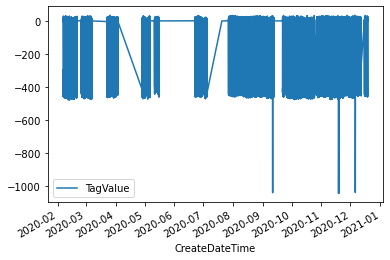

In [9]:
ID_51_2020.plot('CreateDateTime','TagValue')

In [11]:
ID_51_2020

,CreateDateTime,TagValue,TagId
0,2020-02-06 13:05:56.982,-4.050903,51
1,2020-02-06 13:05:57.207,-2.314819,51
2,2020-02-06 13:05:57.411,-4.050903,51
3,2020-02-06 13:05:58.025,-2.314819,51
4,2020-02-06 13:05:58.230,-3.472168,51
...,...,...,...
41324351,2020-12-19 00:11:20.126,0.000000,51
41324352,2020-12-19 00:11:22.150,-1.157471,51
41324353,2020-12-19 00:11:22.370,0.000000,51
41324354,2020-12-19 00:11:22.580,-1.157471,51


In [12]:
Daten_0 = ID_51_2020
Daten_0 = Daten_0[(Daten_0['CreateDateTime']>'2020-11-01 00:00:00')&(Daten_0['CreateDateTime']<'2020-12-31 23:59:59')]
Daten_0.to_csv(r'D:\留德十年\TUD\ADP\Data\2020\ID_51_2020_11.csv')

In [15]:
import numpy as np
from scipy.interpolate import interp1d
 
#创建待插值的数据
x = np.linspace(0, 10*np.pi, 20)
y = np.cos(x)
 
# 分别用linear和quadratic插值
fl = interp1d(x, y, kind='linear')
fq = interp1d(x, y, kind='quadratic')
 
#设置x的最大值和最小值以防止插值数据越界
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
yintq = fq(xint)


In [17]:
x

array([ 0.        ,  1.65346982,  3.30693964,  4.96040945,  6.61387927,
        8.26734909,  9.92081891, 11.57428872, 13.22775854, 14.88122836,
       16.53469818, 18.18816799, 19.84163781, 21.49510763, 23.14857745,
       24.80204727, 26.45551708, 28.1089869 , 29.76245672, 31.41592654])

In [18]:
y

array([ 1.        , -0.08257935, -0.9863613 ,  0.24548549,  0.94581724,
       -0.40169542, -0.87947375,  0.54694816,  0.78914051, -0.67728157,
       -0.67728157,  0.78914051,  0.54694816, -0.87947375, -0.40169542,
        0.94581724,  0.24548549, -0.9863613 , -0.08257935,  1.        ])

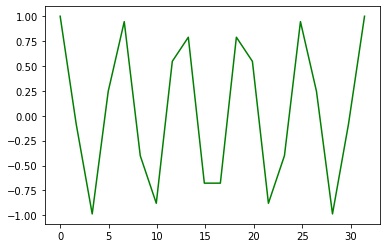

In [21]:
pl.plot(x,y, color="green", label = "Linear")

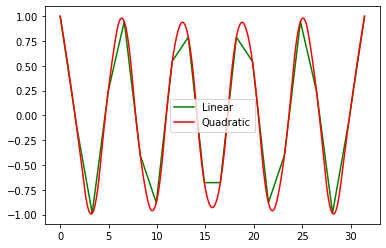

In [19]:

import pylab as pl
pl.plot(xint,fl(xint), color="green", label = "Linear")
pl.plot(xint,fq(xint), color="red", label ="Quadratic")
pl.legend(loc = "best")
pl.show()


In [2]:
ID_12_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_012_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


<AxesSubplot:xlabel='CreateDateTime'>

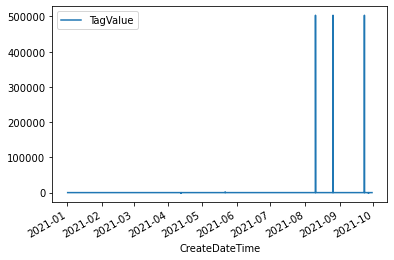

In [3]:
ID_12_2021.plot('CreateDateTime','TagValue')

In [4]:
ID_12_2021

,CreateDateTime,TagValue,TagId
0,2021-01-01 04:09:49.308,-11.91,12
1,2021-01-01 04:09:54.311,-12.06,12
2,2021-01-01 04:38:11.018,-12.00,12
3,2021-01-01 04:38:36.034,-12.06,12
4,2021-01-01 07:24:51.336,-11.70,12
...,...,...,...
70120,2021-09-29 18:44:50.032,-12.06,12
70121,2021-09-29 18:51:45.509,-11.85,12
70122,2021-09-29 18:52:35.581,-12.06,12
70123,2021-09-29 18:55:55.824,-12.03,12


In [5]:
ID_12_2021 = ID_12_2021[(ID_12_2021['TagValue']<100)]

<AxesSubplot:xlabel='CreateDateTime'>

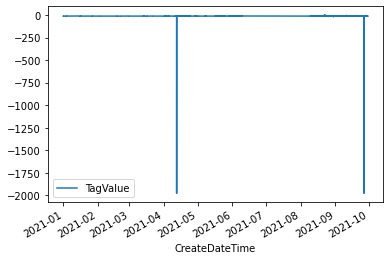

In [6]:
ID_12_2021.plot('CreateDateTime','TagValue')

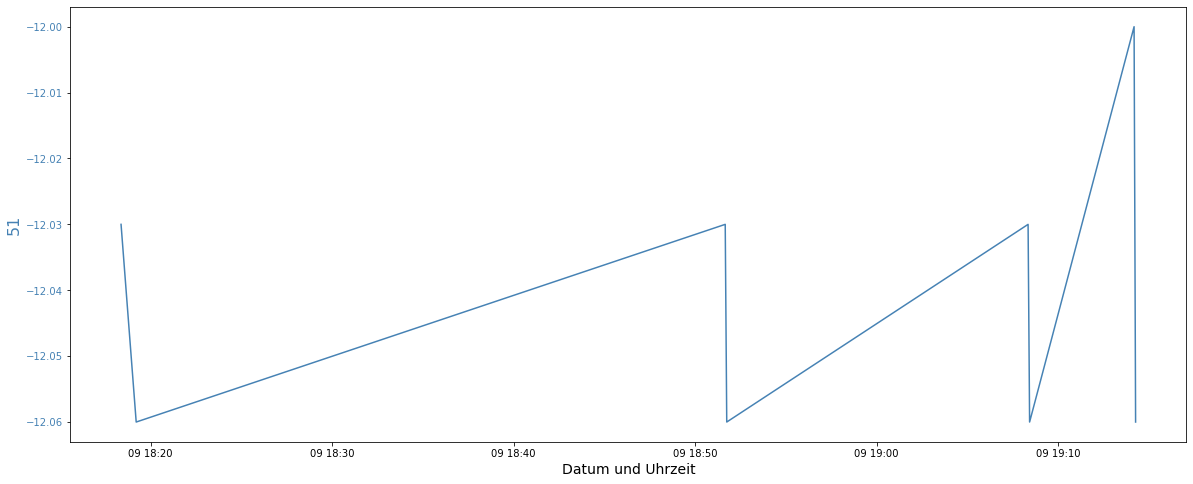

In [10]:
Daten_1=ID_12_2021
# Daten_2=ID_58_2020
# Daten_3=ID_45_2020

Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2021-05-09 18:05:00')&(Daten_1['CreateDateTime']<'2021-05-09 19:45:00')]
# Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-02-12 08:05:00')&(Daten_2['CreateDateTime']<'2020-02-12 08:40:00')]
# Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-09-27 02:30:37')&(Daten_3['CreateDateTime']<'2020-09-27 03:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('51', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((1.5, 6))


#define second y-axis that shares x-axis with current plot


# ax2 = ax.twinx()
# #ax2 = ax.twiny()
# #add second line to plot
# ax2.set_ylabel('58', color=col2, fontsize=16)
# ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
# ax2.tick_params(axis='y', labelcolor=col2)
# plt.ylim((-5, 5))

In [11]:
ID_167_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_167_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')


<AxesSubplot:xlabel='CreateDateTime'>

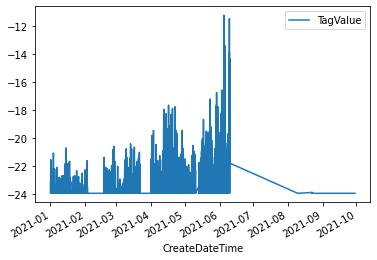

In [13]:
ID_167_2021.plot('CreateDateTime','TagValue')

In [14]:
ID_167_2021

,CreateDateTime,TagValue,TagId
0,2021-01-01 04:09:49.308,-23.100000,167
1,2021-01-01 04:09:54.311,-23.940001,167
2,2021-01-01 04:38:11.018,-23.879999,167
3,2021-01-01 04:38:36.034,-23.940001,167
4,2021-01-01 07:24:51.336,-23.340000,167
...,...,...,...
18144,2021-08-22 22:13:37.103,-23.879999,167
18145,2021-08-22 22:13:57.143,-23.940001,167
18146,2021-08-22 22:29:33.194,-23.879999,167
18147,2021-08-22 22:29:43.197,-23.940001,167
